### Do your imports!

In [718]:
import pandas as pd
import numpy as np

#pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

# 311 data analysis

## Read in `subset.csv` and review the first few rows

Even though it's a giant file – gigs and gigs! – it's a subset of the [entire dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). It covers plenty of years, but not all of the columns.

If your computer is struggling (which it will!) or you are impatient, feel free to use `nrows=` when reading it in to speed up the process by only reading in a subset of columns. Pull in at least a few million, or a couple years back.

In [719]:
pd.read_csv("subset.csv", nrows=5000000)
df = pd.read_csv("subset.csv", nrows=5000000)

df.head()

/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Open Data Channel Type
0,41694420,01/27/2019 07:26:21 PM,02/13/2019 10:53:25 AM,HPD,Department of Housing Preservation and Development,GENERAL,BELL/BUZZER/INTERCOM,RESIDENTIAL BUILDING,11216,30 MAC DONOUGH STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE
1,41694421,01/29/2019 11:06:56 AM,02/13/2019 02:07:22 AM,HPD,Department of Housing Preservation and Development,PAINT/PLASTER,CEILING,RESIDENTIAL BUILDING,10453,30 RICHMAN PLAZA,ADDRESS,BRONX,Closed,BRONX,PHONE
2,41694422,02/13/2019 12:28:18 PM,03/15/2019 09:54:50 AM,DOF,External Affairs Unit,DOF Property - Payment Issue,Bill Received in Error,Property Address,11412,120-25 200 STREET,ADDRESS,SAINT ALBANS,Closed,QUEENS,PHONE
3,41694423,02/13/2019 03:40:19 PM,02/20/2019 06:18:35 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,11377,NaN,INTERSECTION,WOODSIDE,Closed,QUEENS,PHONE
4,41694424,02/13/2019 01:18:31 PM,02/20/2019 05:36:54 AM,DOT,Department of Transportation,Broken Parking Meter,Out of Order,Street,10461,1082 MORRIS PARK AVENUE,ADDRESS,BRONX,Closed,BRONX,PHONE


### Where the subset came from

If you're curious, I took the [original data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data) and clipped out a subset by using the command-line tool [csvkit](https://csvkit.readthedocs.io/en/latest/).

First I inspected the column headers:

```bash
$ csvcut -n 311_Service_Requests_from_2010_to_Present.csv 
```

Then I selected the columns I was interested in and saved it to a file.

```bash
$ csvcut -c 1,2,3,4,5,6,7,8,9,10,16,17,20,26,29 311_Service_Requests_from_2010_to_Present.csv > subset.csv
```

This was much much much much faster than doing it in Python.

## We want more columns!

**Right now we don't see all of the columns.** For example, mine has `...` between the **Incident Address** column and the **City** column. Go up to the top where you imported pandas, and add a `pd.set_option` line that will allow you to view all of the columns of the dataset.

In [720]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Address Type', 'City', 'Status', 'Borough',
       'Open Data Channel Type'],
      dtype='object')

## We hate those column names!

Change the column names to be tab- and period-friendly, like `df.created_date` instead of `df['Created Date']`

In [721]:
df.columns
df.columns.str.lower().str.replace(' ',"_")
df.columns = df.columns.str.lower().str.replace(' ',"_")
#df.columns

# Dates and times

## Are the datetimes actually datetimes?

We're going to be doing some datetime-y things, so let's see if the columns that look like dates are actually dates.

In [722]:
df.created_date
df.closed_date

0          02/13/2019 10:53:25 AM
1          02/13/2019 02:07:22 AM
2          03/15/2019 09:54:50 AM
3          02/20/2019 06:18:35 AM
4          02/20/2019 05:36:54 AM
                    ...          
4999995    08/31/2015 12:00:00 AM
4999996    02/05/2015 09:50:00 AM
4999997    06/05/2017 12:07:17 PM
4999998    02/12/2015 07:37:00 PM
4999999    02/09/2015 10:28:00 PM
Name: closed_date, Length: 5000000, dtype: object

## In they aren't datetimes, convert them

The ones we're interested in are as follows:

* Created Date
* Closed Date

You have two options to convert them:

1. Do it like we did in class, but **overwrite the existing string columns with the new datetime versions**
2. Find an option with `read_csv` to automatically read certain columns as dates! Use the shift+tab trick to read the `read_csv` docs to uncover it. Once you find it, you'll set it to be the **list of date-y columns**.

They're both going to take forever if you do them wrong, but can be faster with a few tricks. For example, using `pd.to_datetime` can be sped up significantly be specifying the format of the datestring.

For example, if your datetime was formatted as `YYYY-MM-DD HH:MM:SS AM`, you could use the following:

```
df.my_datetime = pd.to_datetime(df.my_datetime, format="%Y-%m-%d %I:%M:%S %p")
```

It's unfortunately much much much faster than the `read_csv` technique. And yes, [that's `%I` and not `%H`](https://strftime.org/).

> *Tip: What should happen if it encounters an error or missing data?*

In [723]:
pd.to_datetime(df.created_date, errors="coerce", format="%m/%d/%Y %I:%M:%S %p")
#QUESTION: where did my 'PM' go? %p should account for it? 
df.created_date = pd.to_datetime(df.created_date, errors="coerce", format="%m/%d/%Y %I:%M:%S %p")
#df.created_date

In [724]:
pd.to_datetime(df.closed_date, errors="coerce", format="%m/%d/%Y %I:%M:%S %p")
#QUESTION: why did my AM/PM leave me :'( 
df.closed_date = pd.to_datetime(df.closed_date, errors="coerce", format="%m/%d/%Y %I:%M:%S %p")
#df.closed_date

## According to the dataset, which month of the year has the most 311 calls?

The kind of answer we're looking for is "January," not "January 2021"

In [725]:
#df.head()
#df['month_created'] = pd.to_datetime(df.created_date, errors="coerce", format="%m").dt.strftime('%B')
#df.month_created.value_counts()
#NOTE: At first, I thought maybe I should be doing a str.extract here, but that would have do be done
    # before I converted the created_date column to DT format. 
    # Instead, I chose to create a new column and run value_counts().
    #QUESTION: still feeling like there's another way to do this one....
        #df['day_of_month'] = df.full_flowering_date.str.extract("\d\d\d\d/\d\d/\d\d)", expand=False)
        #df.date_of_incident.str.extract("(\d\d\d\d)", expand=False)
        #df.created_date.str.extract("(\d\d\)", expand=False)
            #and now have learned that I can create a variable, i don't have to create a full column

month = df.created_date.dt.strftime('%B')
month.value_counts()

#instead, if you want to put things in groups based on a column, use groupby
#if you want to put things into groups temporally, use resample
#df.resample('M', on='created_date').size().sort_values()

March        550088
January      530121
April        522149
May          497923
February     455684
June         406593
November     369448
December     360041
October      350836
August       343256
September    323474
July         290387
Name: created_date, dtype: int64

## According to the dataset, which month has had the most 311 calls?

The kind of answer we're looking for is "January 2021," not "January" (although _techniucally_ it will say `2021-01-31`, not `January 2021`)

In [726]:
#df.created_date.value_counts()
#QUESTION: based on the sub instructions above, is this all we need to do for this? 

# year = df.created_date.dt.strftime('%Y')
# #year.value_counts()
# month_year = month + ' ' + year
# month_year.value_counts()

df.resample('M', on='created_date').size().sort_values(ascending=False)

created_date
2019-05-31    213308
2019-03-31    198605
2019-04-30    190354
2019-06-30    131914
2014-01-31    122729
               ...  
2020-08-31       245
2020-11-30       189
2021-02-28       158
2020-09-30        60
2020-10-31        15
Length: 140, dtype: int64

## Plot the 311 call frequency over our dataset on a _weekly_ basis

To make your y axis start at zero, use `ylim=(0,100000)` when doing `.plot`. But replace the `1000` with a large enough value to actually see your data nicely!

In [728]:
df = df.dropna(subset=['created_date'])

#df.rolling(7, on='year', min_periods=7)['created_date'].mean()
#df.rolling(7, on='created_date', min_periods=7).mean()
df.rolling(7, on='created_date', min_periods=7).mean().plot


## What time of day (by hour) is the most least for 311 complains? The most common?


In [729]:
# # Answer for least-common hours to make complaints
# hour = df.created_date.dt.strftime('%H')
# hour.value_counts().tail()
# hour.value_counts().head()
# #....this was so much easier than I thought (unless I'm still doing it wrong!)

In [730]:
df.created_date.dt.hour.value_counts().sort_index()

0     2298283
1       32372
2       24023
3       16288
4       15564
5       19734
6       42243
7       93122
8      153829
9      211975
10     237014
11     228757
12     195868
13     201759
14     223131
15     189451
16     155805
17     119699
18     107527
19     109025
20      89771
21      87220
22      81684
23      65856
Name: created_date, dtype: int64

### Make a graph of the results

* Make sure the hours are in the correct order
* Be sure to set the y-axis to start at 0
* Give your plot a descriptive title

<AxesSubplot:>

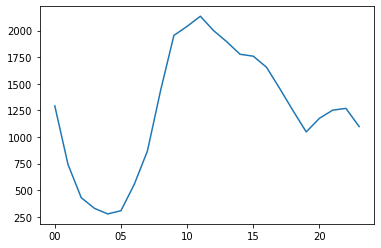

In [731]:
#hour.value_counts()
hour.value_counts().sort_index().plot()

    

# Agencies

## What agencies field the most complaints in the dataset? Get the top 5.

Use the `agency` column for this one.

In [732]:
df.agency.value_counts().head()

HPD     2647612
DOT      694898
DSNY     565296
DOB      354274
NYPD     292550
Name: agency, dtype: int64

## What are each of those agencies?

Define the following five acronyms:

* NYPD
* HPD
* DOT
* DSNY
* DEP

In [733]:
# NYPD: New York Police Dept.
# HPD: Housing Preservation & Development
# DOT: Department of Transportation
# DSNY: Department of Sanitation New York
# DEP: Department of Environmental Protection 

df[df.agency == 'NYPD'].agency_name.head(1)
df[df.agency == 'HPD'].agency_name.head(1)
df[df.agency == 'DOT'].agency_name.head(1)
df[df.agency == 'DSNY'].agency_name.head(1)
df[df.agency == 'DEP'].agency_name.head(1)

#NOTE/QUESTION: possibly could use a lambda here??

9    Department of Environmental Protection
Name: agency_name, dtype: object

## What is the most common complaint to HPD?

In [734]:
df.complaint_type.value_counts().head(1)

HEATING    696677
Name: complaint_type, dtype: int64

## What are the top 3 complaints to each agency?

You'll want to use the weird confusing `.groupby(level=...` thing we learned when reviewing the homework.

In [735]:
df.groupby(by='agency').complaint_type.value_counts()
df.groupby(by='agency').complaint_type.value_counts().groupby(level=0, group_keys=False).head(3)
#df.groupby(['Borough']).Neighborhood.value_counts().groupby(level=0, group_keys=False).head(5)
#https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas

#NOTE: from reading the documentation, I still don't quite understand what "level" does in groupby clauses


agency  complaint_type                           
3-1-1   Noise Survey                                     31
        Benefit Card Replacement                          2
        City Vehicle Placard Complaint                    2
ACS     Forms                                           123
COIB    Forms                                             4
DCA     Consumer Complaint                             6869
        DCA / DOH New License Application Request      2434
DCAS    Question                                        261
        Comments                                         19
DCP     Research Questions                                9
DEP     Water System                                  80197
        Noise                                         67976
        Sewer                                         57304
DFTA    Housing - Low Income Senior                    1764
        Elder Abuse                                     635
        Housing Options                           

In [736]:
#Here is all of my work trying things that did not work for the above question before finding the right answer 
    #(or at least what i think is the right answer)
#df.agency.value_counts().head(3).groupby(by='agency', level=0).complaint_type.value_counts()
    #df.groupby(by='Style').ABV.median().plot(kind='hist')
#df.agency.value_counts().groupby(by='complaint_type', level=0).sum()
    # this gives me the number of complaints per agency in no particular order
    
#df.groupby(by='agency', level=0).complaint_type.value_counts()
#df.groupby(by='agency', level=0)['complaint_type'].value_counts(ascending=False)
#df.groupby(by='agency')['complaint_type'].value_counts(ascending=False)
#df.groupby(by =='NYPD').complaint_type.value_counts()


df[df.agency == 'NYPD'].complaint_type.value_counts().head(3)
df[df.agency == 'HPD'].complaint_type.value_counts().head(3)
df[df.agency == 'DSNY'].complaint_type.value_counts().head(3)
df[df.agency == 'DOT'].complaint_type.value_counts().head(3)
df[df.agency == 'DEP'].complaint_type.value_counts().head(3)


#how could i do this in a single line of code??


Water System    80197
Noise           67976
Sewer           57304
Name: complaint_type, dtype: int64

## What is the most common kind of residential noise complaint?

The NYPD seems to deal with a lot of noise complaints at homes. What is the most common subtype?

In [737]:
#df.complaint_type.value_counts()
#Noise - Residential                      2821
#df.head()

# Searching via text how many complaints contain the word "Noise"
#df.complaint_type.str.contains("Noise", na=False).value_counts()
    #4985 contain "Noise"

#df.complaint_type.str.contains("noise", na=False).value_counts()
    # Just to check, no complaints contain "noise"

# Looking into all noise-type compliants: 
#df[df.complaint_type.str.contains("Noise")]

df[df.complaint_type.str.contains("Noise")].descriptor.value_counts().head(1)
#HALLELUJAH


Loud Music/Party    89904
Name: descriptor, dtype: int64

## What time of day do "Loud Music/Party" complaints come in? Make it a chart!

In [738]:
# #df[df.descriptor == 'Loud Music/Party']
df['hour'] = df.created_date.dt.strftime('%H')
# df[df.descriptor == 'Loud Music/Party'].hour.value_counts().sort_index()
df[df.descriptor == 'Loud Music/Party'].created_date.dt.hour.value_counts().sort_index()

0     10323
1      6980
2      4070
3      2547
4      1526
5       874
6       535
7       534
8       570
9       734
10      916
11     1208
12     1429
13     1690
14     1868
15     2185
16     2652
17     2896
18     3585
19     4864
20     6310
21     8284
22    11508
23    11816
Name: created_date, dtype: int64

<AxesSubplot:title={'center':'Time of day for Loud Music/Party Noise complaints'}>

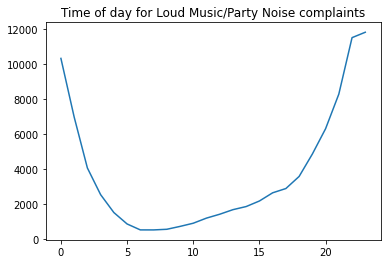

In [739]:
#df[df.descriptor == 'Loud Music/Party'].hour.value_counts().sort_index().plot(title='Time of day for Loud Music/Party Noise complaints')

df[df.descriptor == 'Loud Music/Party'].created_date.dt.hour.value_counts().sort_index().plot(title='Time of day for Loud Music/Party Noise complaints')


## When do people party hard?

Make a monthly chart of Loud Music/Party complaints since the beginning of the dataset. Make it count them on a biweekly basis (every two weeks).

<AxesSubplot:xlabel='created_date'>

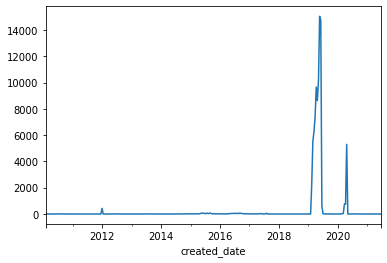

In [740]:
df['month'] = df.created_date.dt.strftime('%B')

#df[df.descriptor == 'Loud Music/Party'].month.value_counts().sort_index().plot(title='Time of year for Loud Music/Party Noise complaints')

df[df.descriptor == 'Loud Music/Party'].resample('2W', on='created_date').size().plot()


## People and their bees

Sometimes people complain about bees! Why they'd do that, I have no idea. It's somewhere in "complaint_type" – can you find all of the bee-related complaints?

In [742]:
# Checking out how many bee complaints we are dealing with within the rows read in above
df.complaint_type.str.contains("Bee", na=False).value_counts()

# Looking into all bee-type compliants: 
df[df.complaint_type.str.contains("Bee")]
#'Harboring Bees/Wasps'


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,address_type,city,status,borough,open_data_channel_type,hour,month
288065,42054326,2019-03-26 19:10:34,2019-04-05 15:00:55,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11103.0,24-19 42 STREET,ADDRESS,ASTORIA,Closed,QUEENS,PHONE,19,March
291446,42058804,2019-03-26 18:14:03,2019-04-05 15:02:00,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11104.0,42-19 42 STREET,ADDRESS,SUNNYSIDE,Closed,QUEENS,PHONE,18,March
372834,42163934,2019-04-08 18:26:04,2019-04-29 11:18:17,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,10302,57 HOOKER PLACE,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,18,April
378505,42171504,2019-04-08 15:50:40,2019-04-29 11:11:42,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Mixed Use Building,11214,2060 78 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,ONLINE,15,April
391645,42189666,2019-04-10 19:28:14,2019-04-29 11:17:09,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10469,1462 STICKNEY PLACE,ADDRESS,BRONX,Closed,BRONX,PHONE,19,April
466469,42291921,2019-04-23 11:39:59,2019-05-06 09:36:28,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11210,674 EAST 22 STREET,ADDRESS,BROOKLYN,Closed,BROOKLYN,PHONE,11,April
472431,42300656,2019-04-23 14:56:21,2019-05-06 09:37:30,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,3+ Family Apartment Building,10037,2311 5 AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,PHONE,14,April
506112,42497797,2019-04-28 15:33:33,2019-05-13 11:10:45,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,11385,2017 HARMAN STREET,ADDRESS,RIDGEWOOD,Closed,QUEENS,ONLINE,15,April
532844,42533095,2019-05-02 13:13:47,2019-05-13 11:10:47,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Bees/Wasps - Not a beekeper,1-2 Family Dwelling,11419,107-14 125 STREET,ADDRESS,SOUTH RICHMOND HILL,Closed,QUEENS,ONLINE,13,May
547427,42549720,2019-05-02 12:45:50,2019-05-13 11:10:46,DOHMH,Department of Health and Mental Hygiene,Harboring Bees/Wasps,Beekeeping - Honeybees,1-2 Family Dwelling,10309,62 SHARROTTS ROAD,ADDRESS,STATEN ISLAND,Closed,STATEN ISLAND,PHONE,12,May


### What month do most of the complaints happen in? I'd like to see a graph.

<AxesSubplot:title={'center':'Bee complaints in NYC by month'}>

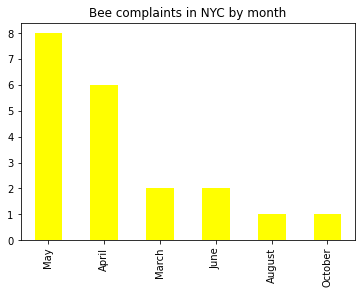

In [748]:
df[df.complaint_type.str.contains("Bee")].month.value_counts().plot(kind='bar', title='Bee complaints in NYC by month', color='yellow')

#JESSIE: does this work too?
#df[df.complaint_type.str.contains("Bee")].resample('M', on='created_date').size().plot()


### Are the people getting in trouble usually beekeepers or not beekeepers?

In [749]:
df[df.complaint_type.str.contains("Bee")]
#df[df.descriptor.str.contains("beekeper")]
    #why does this give me an error about non-boolean arrays? --> OH NAN
    
#df = df.dropna(subset=['descriptor'])
df.descriptor.value_counts()
df.descriptor.str.contains("beekeper", na=False).value_counts()
#would really need to turn first line into a column in order to do the above? 

# WHY DID THEY MISSPELL 'BEEKEEPER' EVERY SINGLE TIME

False    4999988
True          12
Name: descriptor, dtype: int64

# Math with datetimes

## How long does it normally take to resolve a 311 complaint?

Even if we didn't cover this in class, I have faith that you can guess how to calculate it.

In [750]:
df.columns

(df.closed_date - df.created_date).median()


Timedelta('3 days 19:25:54')

Save it as a new column called `time_to_fix`

In [751]:
df['time_to_fix'] = df.closed_date - df.created_date
df.time_to_fix

0          16 days 15:27:04
1          14 days 15:00:26
2          29 days 21:26:32
3           6 days 14:38:16
4           6 days 16:18:23
                 ...       
4999995   205 days 18:38:00
4999996     0 days 23:37:41
4999997     4 days 22:42:05
4999998     4 days 21:18:00
4999999     3 days 13:52:02
Name: time_to_fix, Length: 5000000, dtype: timedelta64[ns]

## Which agency has the best time-to-fix time?

In [752]:
df = df.dropna(subset=['time_to_fix'])

df.groupby(by='agency').time_to_fix.median().groupby(level=0, group_keys=False).head(1).sort_values()

# Applied the same logic as in the question about Top 3 Complaints for each agency
# Decided to drop NaN values bc we already dropped for created_date
    # And NaN values seemed to be interfering with my .mean()

#QUESITON: mean or meadian for this set of Q's? 

agency
3-1-1           0 days 00:00:36
HRA             0 days 00:00:39
DHS             0 days 01:22:20
NYPD            0 days 02:22:36
DOT      0 days 14:41:15.500000
DEP             0 days 23:24:00
DORIS           1 days 00:03:53
DOF             1 days 21:21:51
DSNY            1 days 21:30:00
DCA             2 days 14:32:12
DPR      2 days 23:04:54.500000
DOHMH    3 days 17:09:49.500000
DOE      4 days 13:07:01.500000
HPD             6 days 00:00:00
DFTA    10 days 23:01:20.500000
NYCEM   12 days 18:18:52.500000
DOB     13 days 06:02:31.500000
DOITT          14 days 18:22:58
EDC            19 days 01:15:08
TLC            33 days 00:39:04
Name: time_to_fix, dtype: timedelta64[ns]

## Maybe we need some more information...

I might want to know how big our sample size is for each of those, maybe the high performers only have one or two instances of having requests filed!

### First, try using `.describe()` on the time to fix column after your `groupby`.

In [754]:
df.groupby(by='agency').describe()

unique_key                                                       \
            count          mean           std         min          25%   
agency                                                                   
3-1-1        35.0  2.328798e+07  2.731569e+06  22420666.0  22425902.50   
DCA        9303.0  4.047591e+07  5.053627e+06  15773785.0  35485450.50   
DEP      235410.0  3.257525e+07  1.091032e+07  15635861.0  21034419.25   
DFTA       3534.0  4.000464e+07  4.818749e+06  23566269.0  36048412.25   
DHS        1504.0  3.858712e+07  4.947700e+06  26179162.0  33989345.25   
DOB      353704.0  2.957494e+07  1.120478e+07  15636311.0  20418664.75   
DOE         412.0  4.146175e+07  3.569408e+06  22427288.0  41849078.00   
DOF       79370.0  3.248548e+07  2.923360e+06  22959591.0  30308662.25   
DOHMH     11598.0  4.174496e+07  3.050319e+06  15634405.0  41883487.25   
DOITT       162.0  4.148159e+07  3.926576e+06  16228771.0  41935792.50   
DORIS        53.0  3.279802e+07  1.734628e+05  32514938.0  32642671.00   
DOT      684078.0  2.810825e+07  9.688204e+06  15631032.0  21038895.25   
DPR       37898.0  3.657929e+07  4.952971e+06  15901928.0  32533719.25   
DSNY     563401.0  2.978237e+07  1.028295e+07  15636100.0  21661481.00   
EDC         213.0  4.145176e+07  4.392149e+06  22426473.0  41908118.00   
HPD     2578333.0  2.584178e+07  8.244277e+06  15629728.0  21394170.00   
HRA       55128.0  3.283657e+07  2.034849e+06  29139291.0  31078492.75   
NYCEM       590.0  3.300264e+07  1.469554e+06  31117280.0  31663220.00   
NYPD     291560.0  4.233555e+07  2.265581e+06  15650160.0  42023049.75   
TLC        4417.0  3.875388e+07  6.089228e+06  15647824.0  34932760.00   

                                            time_to_fix  \
               50%          75%         max       count   
agency                                                    
3-1-1   22427375.0  22428553.00  34735182.0          35   
DCA     42115910.0  42867546.50  46068444.0        9303   
DEP     36164510.0  43005002.75  51478970.0      235410   
DFTA    42048489.0  42558910.75  46068443.0        3534   
DHS     36100431.0  42291916.50  51438429.0        1504   
DOB     23884633.5  42544075.25  51358364.0      353704   
DOE     42073829.5  42560929.00  50837830.0         412   
DOF     32229924.5  34441650.75  43048380.0       79370   
DOHMH   42058965.5  42235417.75  51453533.0       11598   
DOITT   42124526.0  42540799.50  46067543.0         162   
DORIS   32804512.0  32923022.00  33067484.0          53   
DOT     25082438.5  41746717.00  51483230.0      684078   
DPR     34537598.0  42121105.50  50555316.0       37898   
DSNY    25797132.0  42196461.00  51476898.0      563401   
EDC     42066976.0  42192426.00  46066175.0         213   
HPD     24190485.0  26769943.00  51482626.0     2578333   
HRA     32895852.0  34587553.25  36303727.0       55128   
NYCEM   32626906.0  34240312.75  36302735.0         590   
NYPD    42369071.0  42762574.25  51007878.0      291560   
TLC     41923557.0  42134336.00  46066984.0        4417   

                                                                  \
                               mean                          std   
agency                                                             
3-1-1        0 days 00:00:53.400000    0 days 00:01:29.568967840   
DCA      10 days 08:02:23.123293561   32 days 18:31:59.099778623   
DEP       8 days 03:01:11.942908117   59 days 16:08:50.938074907   
DFTA      9 days 19:11:32.515563101    6 days 02:05:40.511492686   
DHS       0 days 18:52:43.148271276   15 days 09:15:34.032935557   
DOB      68 days 09:39:51.322973448  187 days 00:14:50.787077724   
DOE      23 days 02:47:59.990291262   76 days 12:20:04.878592849   
DOF       4 days 11:26:19.417487715    7 days 23:06:38.276044609   
DOHMH     9 days 06:55:59.231246766  376 days 02:09:08.447671736   
DOITT    17 days 20:42:23.938271605   19 days 14:24:15.076224380   
DORIS     3 days 20:56:12.698113207    4 days 09:09:43.2185683

### Now, an alternative

Seems a little busy, yeah? **You can also do smaller, custom aggregations.**

Try something like this:

```python
# Multiple aggregations of one column
df.groupby('agency').time_to_fix.agg(['median', 'size'])

# You can also do something like this to reach multiple columns
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})
```

In [757]:
df.groupby('agency').time_to_fix.agg(['median', 'size'])

,median,size
agency,,
3-1-1,0 days 00:00:36,35
DCA,2 days 14:32:12,9303
DEP,0 days 23:24:00,235410
DFTA,10 days 23:01:20.500000,3534
DHS,0 days 01:22:20,1504
DOB,13 days 06:02:31.500000,353704
DOE,4 days 13:07:01.500000,412
DOF,1 days 21:21:51,79370
DOHMH,3 days 17:09:49.500000,11598


In [758]:
df.groupby('agency').agg({
    'time_to_fix': ['median', 'size']
})

time_to_fix         
                        median     size
agency                                 
3-1-1          0 days 00:00:36       35
DCA            2 days 14:32:12     9303
DEP            0 days 23:24:00   235410
DFTA   10 days 23:01:20.500000     3534
DHS            0 days 01:22:20     1504
DOB    13 days 06:02:31.500000   353704
DOE     4 days 13:07:01.500000      412
DOF            1 days 21:21:51    79370
DOHMH   3 days 17:09:49.500000    11598
DOITT         14 days 18:22:58      162
DORIS          1 days 00:03:53       53
DOT     0 days 14:41:15.500000   684078
DPR     2 days 23:04:54.500000    37898
DSNY           1 days 21:30:00   563401
EDC           19 days 01:15:08      213
HPD            6 days 00:00:00  2578333
HRA            0 days 00:00:39    55128
NYCEM  12 days 18:18:52.500000      590
NYPD           0 days 02:22:36   291560
TLC           33 days 00:39:04     4417

## Seems weird that NYPD time-to-close is so fast. Can we break that down by complaint type?

Remember the order: 

1. Filter
2. Group
3. Grab a column
4. Do something with it
5. Sort

In [759]:
# # Filter
# df[df.agency == 'NYPD']

# # Group + grab a column

# df[df.agency == 'NYPD'].groupby(by='agency').complaint_type

# # Do something with it! 

# df[df.agency == 'NYPD'].groupby(by='agency').complaint_type.value_counts()

# # Sort

df[df.agency == 'NYPD'].groupby(by='agency').complaint_type.value_counts().sort_values(ascending=False)



agency  complaint_type             
NYPD    Noise - Residential            86132
        Illegal Parking                64621
        Blocked Driveway               44412
        Noise - Street/Sidewalk        29473
        Noise - Vehicle                16438
        Noise - Commercial             15821
        Derelict Vehicle               13416
        Non-Emergency Police Matter     9749
        Animal Abuse                    2565
        Traffic                         1632
        Noise - Park                    1582
        Vending                         1549
        Homeless Encampment             1216
        Drug Activity                    626
        Drinking                         505
        Abandoned Vehicle                330
        Noise - House of Worship         328
        Bike/Roller/Skate Chronic        201
        Homeless Street Condition        199
        Urinating in Public              188
        Panhandling                      177
        Animal-Abus

## Back to median fix time for all agencies: do these values change based on the borough?

First, use `groupby` to get the median time to fix per agency in each borough. You can use something like `pd.set_option("display.max_rows", 200)` if you can't see all of the results by default!

In [760]:
df.groupby(['agency', 'borough']).time_to_fix.agg(['median', 'size'])
#df.borough.value_counts()
#df.groupby(by='agency').borough.value_counts()
#df.groupby(by='agency').borough.value_counts().time_to_fix.median().groupby(level=0, group_keys=False)
#df.groupby(by='agency').time_to_fix.median().groupby(level=0, group_keys=False).borough.value_counts()



median  size
agency borough                                    
3-1-1  BROOKLYN              0 days 00:00:41     9
       MANHATTAN      0 days 00:00:28.500000    18
       QUEENS         0 days 00:00:49.500000     6
       Unspecified    0 days 00:00:07.500000     2
DCA    BRONX                 2 days 03:07:54  1131
...                                      ...   ...
TLC    BROOKLYN             38 days 00:15:32   621
       MANHATTAN     42 days 18:43:23.500000  2144
       QUEENS        29 days 20:15:18.500000   716
       STATEN ISLAND        43 days 19:21:39    21
       Unspecified    0 days 00:01:01.500000   666

[102 rows x 2 columns]

In [761]:
#df.groupby(by='agency').borough.value_counts().time_to_fix.agg(['median', 'size'])

### Or, use another technique!

We talked about pivot table for a hot second in class, but it's (potentially) a good fit for this situation:

```python
df.pivot_table(
    columns='what will show up as your columns',
    index='what will show up as your rows',
    values='the column that will show up in each cell',
    aggfunc='the calculation(s) you want dont'
)
```

In [762]:
# Back to median fix time for all agencies: do these values change based on the borough?
# First, use groupby to get the median time to fix per agency in each borough.

#we want median time-to-fix in each borough 
#in a graph, that would be a bar chart 
#in a table, columns would be time-to-fix
#rows would be each boro (but could be reversed, doesnt really matter )

df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc=['median', 'size'],
)

median                         \
borough                   BRONX               BROOKLYN   
agency                                                   
3-1-1                       NaT        0 days 00:00:41   
DCA             2 days 03:07:54        2 days 01:47:01   
DEP             0 days 20:34:00        0 days 19:01:00   
DFTA    12 days 00:59:43.500000        9 days 06:52:11   
DHS             0 days 01:20:15        0 days 01:24:32   
DOB            23 days 00:59:04       11 days 09:19:35   
DOE      3 days 16:47:19.500000        2 days 17:40:14   
DOF             1 days 21:11:11 1 days 17:15:19.500000   
DOHMH           2 days 00:00:00        4 days 00:00:00   
DOITT          14 days 15:53:27       13 days 21:53:22   
DORIS                       NaT                    NaT   
DOT             0 days 03:20:00        0 days 12:29:18   
DPR             2 days 21:42:46        2 days 16:13:06   
DSNY            1 days 05:38:00        1 days 23:05:00   
EDC            36 days 20:56:32       22 days 08:39:46   
HPD             5 days 00:00:00        5 days 00:00:00   
HRA                         NaT                    NaT   
NYCEM                       NaT                    NaT   
NYPD     0 days 03:20:08.500000        0 days 02:22:29   
TLC            42 days 06:16:34       38 days 00:15:32   

                                                         \
borough               MANHATTAN                  QUEENS   
agency                                                    
3-1-1    0 days 00:00:28.500000  0 days 00:00:49.500000   
DCA             2 days 02:11:19         2 days 14:35:38   
DEP             1 days 22:02:00         0 days 21:00:00   
DFTA           10 days 20:59:03        11 days 05:25:42   
DHS             0 days 01:30:42  0 days 01:13:52.500000   
DOB            10 days 04:17:22        15 days 07:50:21   
DOE             4 days 02:16:48         5 days 02:39:22   
DOF      1 days 18:51:53.500000         1 days 18:18:33   
DOHMH           3 days 00:00:00         5 days 00:00:00   
DOITT          14 days 17:30:55 16 days 00:37:46.500000   
DORIS                       NaT                     NaT   
DOT      0 days 20:39:43.500000         0 days 15:26:52   
DPR             4 days 02:50:41  3 days 02:04:52.500000   
DSNY            1 days 13:59:00         2 days 00:00:00   
EDC            18 days 21:13:10        16 days 03:48:52   
HPD             6 days 00:00:00         7 days 06:32:25   
HRA                         NaT                     NaT   
NYCEM                       NaT                     NaT   
NYPD            0 days 01:44:05         0 days 02:24:06   
TLC     42 days 18:43:23.500000 29 days 20:15:18.500000   

                                                             size            \
borough           STATEN ISLAND             Unspecified     BRONX  BROOKLYN   
agency                                                                        
3-1-1                       NaT  0 days 00:00:07.500000       NaN       9.0   
DCA      2 days 15:41:05.500000         2 days 21:53:44    1131.0    1897.0   
DEP             0 days 18:58:00         0 days 06:04:30   26274.0   64587.0   
DFTA    10 days 21:04:10.500000        13 days 00:18:09     640.0    1299.0   
DHS      0 days 00:56:32.500000         0 days 00:14:28      74.0     253.0   
DOB             9 days 11:53:26         0 days 21:32:19   49886.0  112296.0   
DOE             7 days 17:01:37         5 days 13:39:01      86.0      85.0   
DOF             1 days 07:16:20         3 days 02:53:32    6643.0   18912.0   
DOHMH           7 days 00:00:00        19 days 10:07:57    1824.0    3737.0   
DOITT          17 days 21:47:06       165 days 00:01:33      10.0      35.0   
DORIS                       NaT         1 days 00:03:53       NaN       NaN   
DOT             1 days 01:34:00         0 days 21:53:09   94500.0  204687.0   
DPR             2 days 01:40:54         3 days 05:32:53    4350.0   10616.0   
DSNY            1 days 22:43:00         1 days 21:22:30   60015.0  1

### Use the pivot table result to find the worst-performing agency in the Bronx, then compare with Staten Island

Since it's a dataframe, you can use the power of `.sort_values` (twice!). Do any of the agencies have a large difference between the two?

In [763]:
df_pivot = df.pivot_table(
    columns='borough',
    index='agency',
    values='time_to_fix',
    aggfunc='median',
)

df_pivot.sort_values(by='BRONX')


borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
DHS,0 days 01:20:15,0 days 01:24:32,0 days 01:30:42,0 days 01:13:52.500000,0 days 00:56:32.500000,0 days 00:14:28
DOT,0 days 03:20:00,0 days 12:29:18,0 days 20:39:43.500000,0 days 15:26:52,1 days 01:34:00,0 days 21:53:09
NYPD,0 days 03:20:08.500000,0 days 02:22:29,0 days 01:44:05,0 days 02:24:06,0 days 02:22:05,0 days 09:16:50
DEP,0 days 20:34:00,0 days 19:01:00,1 days 22:02:00,0 days 21:00:00,0 days 18:58:00,0 days 06:04:30
DSNY,1 days 05:38:00,1 days 23:05:00,1 days 13:59:00,2 days 00:00:00,1 days 22:43:00,1 days 21:22:30
DOF,1 days 21:11:11,1 days 17:15:19.500000,1 days 18:51:53.500000,1 days 18:18:33,1 days 07:16:20,3 days 02:53:32
DOHMH,2 days 00:00:00,4 days 00:00:00,3 days 00:00:00,5 days 00:00:00,7 days 00:00:00,19 days 10:07:57
DCA,2 days 03:07:54,2 days 01:47:01,2 days 02:11:19,2 days 14:35:38,2 days 15:41:05.500000,2 days 21:53:44
DPR,2 days 21:42:46,2 days 16:13:06,4 days 02:50:41,3 days 02:04:52.500000,2 days 01:40:54,3 days 05:32:53


In [764]:
df_pivot.sort_values(by='STATEN ISLAND')

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
agency,,,,,,
DHS,0 days 01:20:15,0 days 01:24:32,0 days 01:30:42,0 days 01:13:52.500000,0 days 00:56:32.500000,0 days 00:14:28
NYPD,0 days 03:20:08.500000,0 days 02:22:29,0 days 01:44:05,0 days 02:24:06,0 days 02:22:05,0 days 09:16:50
DEP,0 days 20:34:00,0 days 19:01:00,1 days 22:02:00,0 days 21:00:00,0 days 18:58:00,0 days 06:04:30
DOT,0 days 03:20:00,0 days 12:29:18,0 days 20:39:43.500000,0 days 15:26:52,1 days 01:34:00,0 days 21:53:09
DOF,1 days 21:11:11,1 days 17:15:19.500000,1 days 18:51:53.500000,1 days 18:18:33,1 days 07:16:20,3 days 02:53:32
DSNY,1 days 05:38:00,1 days 23:05:00,1 days 13:59:00,2 days 00:00:00,1 days 22:43:00,1 days 21:22:30
DPR,2 days 21:42:46,2 days 16:13:06,4 days 02:50:41,3 days 02:04:52.500000,2 days 01:40:54,3 days 05:32:53
DCA,2 days 03:07:54,2 days 01:47:01,2 days 02:11:19,2 days 14:35:38,2 days 15:41:05.500000,2 days 21:53:44
DOHMH,2 days 00:00:00,4 days 00:00:00,3 days 00:00:00,5 days 00:00:00,7 days 00:00:00,19 days 10:07:57


## What were the top ten 311 types of complaints on Thanksgiving 2020? Are they different than the day before Thanksgiving?

**Finding exact dates is awful, honestly.** While you can do something like this to ask for rows after a specific date:

```python
df[df.date_column >= '2020-01-01']
```

You, for some reason, can't ask for an **exact match** unless you're really looking for exactly at midnight. For example, this won't give you what you want:

```python
df[df.date_column == '2020-01-01']
```

Instead, the thing you need to do is this:

```python
df[(df.date_column >= '2020-01-01') & (df.date_column < '2020-01-02']
```

Everything that starts at midnight on the 1st but *is still less than midnight on the 2nd**.

In [768]:
df[(df.created_date >= '2020-11-26') & (df.created_date < '2020-11-27')].complaint_type.sort_values().head(10)
#only two complaints for Thanksgiving Day 2020 in the 5,000,000 rows read in


2126217             Derelict Vehicles
3519724    Homeless Person Assistance
Name: complaint_type, dtype: object

In [770]:
df[(df.created_date >= '2020-11-25') & (df.created_date < '2020-11-26')].complaint_type.sort_values().head(10)
#There were more complaints for the day before Thanksgiving, but they matched one of the two for Thanksgiving Day


2124576    Derelict Vehicles
2125606    Derelict Vehicles
2125613    Derelict Vehicles
2125678    Derelict Vehicles
2125755    Derelict Vehicles
2125757    Derelict Vehicles
2125811    Derelict Vehicles
2125860    Derelict Vehicles
2126032    Derelict Vehicles
Name: complaint_type, dtype: object

## What is the most common 311 complaint types on Christmas day?

And I mean *all Christmas days*, not just in certain years)

* Tip: `dt.` and `&` are going to be your friend here
* Tip: If you want to get fancy you can look up `strftime`
* Tip: One of those is much much faster than the other

In [771]:
#i think you could use strftime to convert all 12/25 values to "christmas day "
df['month_day'] = df.created_date.dt.strftime('%m/%d')
df.month_day.head()
#christmas_complaints = df[df.month_day == "12/25"]

0    01/27
1    01/29
2    02/13
3    02/13
4    02/13
Name: month_day, dtype: object

In [804]:
christmas_df = df[df.month_day == 12/25 ]
christmas_df.complaint_type.value_counts(ascending=False)
# Not sure what is going wrong here! 


Series([], Name: complaint_type, dtype: int64)

# Stories

Let's approach this from the idea of **having stories and wanting to investigate them.** Fun facts:

* Not all of these are reasonably answered with what our data is
* We only have certain skills about how to analyzing the data
* There are about six hundred approaches for each question

But: **for most of these prompts there are at least a few ways you can get something interesting out of the dataset.**

## Fireworks and BLM

You're writing a story about the anecdotal idea that the summer of the BLM protests there were an incredible number of fireworks being set off. Does the data support this?

What assumptions is your analysis making? What could make your analysis fall apart?

In [777]:
# Checking out how many firework complaints we are dealing with within the rows read in above
df.complaint_type.str.contains("Firework", na=False).value_counts()

# Looking into all firework compliants: 
df[df.complaint_type.str.contains("Firework")]
# 'Illegal Fireworks'

# To start this story, I would plot the number of firework complaints by year.
    # Then, I would try to isolate summer-ish months firework complainst, so I might only plot by the months of May-Aug. for each year

    #I'm going to make a month_year column for ease

df['month_year'] = df.created_date.dt.strftime('%m/%Y')


<AxesSubplot:>

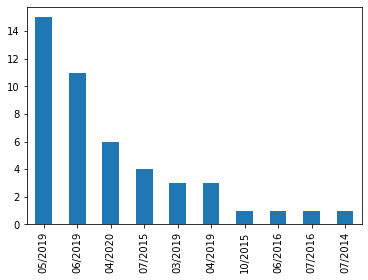

In [801]:
df[df.complaint_type.str.contains("Firework")].month_year.value_counts().sort_values(ascending=False).plot(kind='bar')
#Ideally this would be chronological, not sure why sorting values is going to Firework counts, rather than month_year values

## Sanitation and work slowdowns

The Dept of Sanitation recently had a work slowdown to protest the vaccine mandate. You'd like to write about past work slowdowns that have caused garbage to pile up in the street, streets to not be swept, etc, and compare them to the current slowdown. You've also heard rumors that it was worse in Staten Island and a few Brooklyn neighborhoods - Marine Park and Canarsie - than everywhere else.

Use the data to find timeframes worth researching, and note how this slowdown might compare. Also, is there anything behind the geographic issue?

What assumptions is your analysis making? What could make your analysis fall apart?

In [781]:
# Want to ask df for times where there have been a lot of sanitation complaints 
# First, isolate Dept of Sanitation complints     
df[df.agency == 'DSNY']

# Now, I want to take a look at the kinds of complainst DSNY usually gets
df[df.agency == 'DSNY'].complaint_type.value_counts()

# Could look for top 3 complaints for DSNY across month_year
df[df.agency == 'DSNY'].groupby(by='month_year').complaint_type.value_counts().sort_values(ascending=False).head(3)
    # This will give me the top 3 complaints to the DSNY for every month_year it recieved complaints


month_year  complaint_type                     
05/2019     Request Large Bulky Item Collection    19276
06/2019     Request Large Bulky Item Collection    18445
03/2019     Request Large Bulky Item Collection    16452
Name: complaint_type, dtype: int64

<AxesSubplot:>

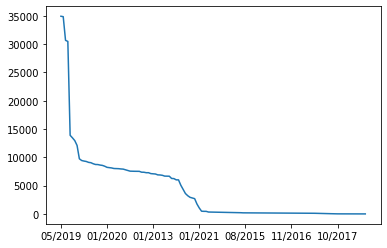

In [800]:
#Now I want to plot the number of total complaints to the NYDS by month_year to look for general upticks and dips
df[df.agency == 'DSNY'].month_year.value_counts().sort_values(ascending=False).plot()

# This graph is not the way I want it to be! 

# I would then look at the month_years with the dips in the plot below and look for correspondning top 3 complaints based on function above
# These would be my timeframes worth researching + insight on what ppl were complaining abt during those months


In [783]:
# Now I want to bring neighborhood into the mix 
df[df.agency == 'DSNY'].borough.value_counts()
    #This shows me the number of DSNY complaints in each borough

# I want to know how this number changes based off the months worth researching above 

df[df.agency == 'DSNY'].groupby(by='month_year').borough.value_counts()
# To get down to the specific neighborhood within each borough, I think I'd have to join neighborhood data based on zipcode
    # Or I could do some sort of geolocation based on icident address? 

month_year  borough      
01/2010     BROOKLYN         2634
            QUEENS           2576
            BRONX            1029
            MANHATTAN         962
            STATEN ISLAND     923
                             ... 
12/2020     BROOKLYN           93
            QUEENS             80
            BRONX              69
            STATEN ISLAND      16
            MANHATTAN          11
Name: borough, Length: 673, dtype: int64

In [784]:
#"What assumptions is your analysis making? What could make your analysis fall apart?"

# This analysis assumes complaints to NYSD are consistent/not impacted by any other outside factors other than more reasons to complain 


## Gentrification and whining to the government

It's said that when a neighborhood gentrifies, the people who move in are quick to report things to authorities that would previously have been ignored or dealt with on a personal basis. Use the data to investigate the concept (two techniques for finding gentrifying area are using census data and using Google).

What assumptions is your analysis making? What could make your analysis fall apart? Be sure to cite your sources. 

<AxesSubplot:title={'center':'Complaints count in 10039 over time'}, xlabel='created_date'>

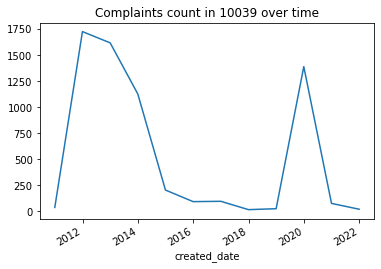

In [787]:
df.head()
# https://patch.com/new-york/new-york-city/these-nyc-neighborhoods-are-among-nations-most-gentrified
# according to this article, zip codes to investigate for years leading up to 2018 are: 
    #10039
    #10026
    #11211
    #11222
    #11216
# In the real world, I would prereport the above much more and get a definitive list of zips to investigate after talking to experts and locals + researching economic data 
# For the purposes of this exercise, I'm going to take a look at the first two zips 

df[df.incident_zip == '10039'].resample('Y', on='created_date').size().sort_values(ascending=False).plot(title='Complaints count in 10039 over time')
# NOTE: complaints do seem to have increased after 2018, but I'd need to investigate other reasons why that might be before assuming it's a result of gentrification

<AxesSubplot:title={'center':'Complaints count in 10026 over time'}, xlabel='created_date'>

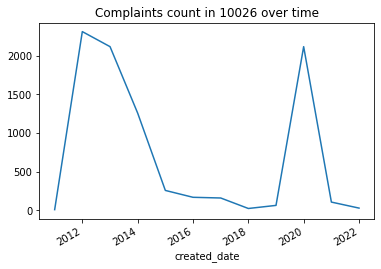

In [788]:
df[df.incident_zip == '10026'].resample('Y', on='created_date').size().sort_values(ascending=False).plot(title='Complaints count in 10026 over time')
# NOTE: same as above

In [789]:
#For further investigation: 
    # I could also take a look at most common complaints over time to see if they changed 

In [790]:
#"What assumptions is your analysis making? What could make your analysis fall apart?"

    # Does not account for outside factors changing complaint rate in certain zipcodes
    # Does not account for specific new problems in zip codes 

## 311 quirks

Our editor tried to submit a 311 request using the app the other day, but it didn't go through. As we all know, news is what happens to your editor! Has the 311 mobile app ever actually stopped working?

If that's a dead end, maybe you can talk about the differences between the different submission avenues: could a mobile outage disproportionately impact a certain kind of complaint or agency? How about if the phone lines stopped working?

What assumptions is your analysis making? What could make your analysis fall apart?

<AxesSubplot:xlabel='created_date'>

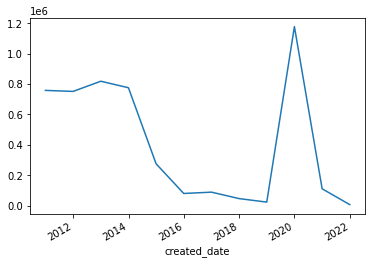

In [791]:
#looking for hours where complaints coming in are zero 
df.resample('Y', on='created_date').size().sort_values(ascending=False).plot()
    #NOTE: I'm doing 'year' here bc I worry by 'hour' will overload my computer

<AxesSubplot:xlabel='created_date'>

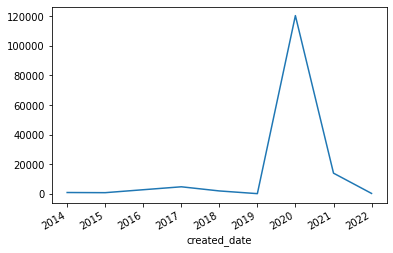

In [792]:
# Now, looking at the most common channels for making complaints 
df.open_data_channel_type.value_counts()

# Need to combine these two concepts, first by isolating mobile-type complaints

#Experimenting with mobile-type complaints
df[df.open_data_channel_type == 'MOBILE'].complaint_type.value_counts()

mobile_df = df[df.open_data_channel_type == 'MOBILE']

mobile_df.resample('Y', on='created_date').size().sort_values(ascending=False).plot()
#NOTE: again wanting to break this down by week, isolate peaks, and then look by hour
    #I'm very worried about my computer's capacity to that, so I'm just sharing my intention for now :/ 


In [793]:
#"could a mobile outage disproportionately impact a certain kind of complaint or agency?"
    #"How about if the phone lines stopped working?"

# The following will show the top 3 agencies that recieve complaints via app,
    # which would show the agencies most likely to be affected by 311 app outage
mobile_df.agency.value_counts().head(3)

# The following will show the top 3 complaint types submitted via mobile app,
    # which would show the complaints most likely to dip in the event of an app outage 
mobile_df.complaint_type.value_counts().head(3)

HEAT/HOT WATER         35237
Illegal Parking        26130
Noise - Residential    20653
Name: complaint_type, dtype: int64

In [794]:
#"How about if the phone lines stopped working?"

#The following will show top complaint types and agencies for complaints by phone
    #This could provide a contrast to the mobile submissions above 
df[df.open_data_channel_type == 'PHONE'].complaint_type.value_counts().head(3)
df[df.open_data_channel_type == 'PHONE'].agency.value_counts().head(3)

HPD     1105666
DSNY     450585
NYPD     117778
Name: agency, dtype: int64

In [795]:
#"What assumptions is your analysis making? What could make your analysis fall apart?""

#In this particular analysis, we are assuming that a dip in mobile submissions means the app crashed
    # which is not necessarily true 

## NYCHA and public funds

NYC's public housing infrastructure is failing, and one reason is lack of federal funds. While the recent spending bills passed through Congress might be able to help, the feeling is that things have really fallen apart in the past however-many years – as time goes on it gets more and more difficult for the agency in control of things to address issues in a timely manner.

If you were tasked with finding information to help a reporter writing on this topic, you will **not** reasonably be able to find much in the dataset to support or refute this. Why not? 

If you wanted to squeeze something out of this dataset anyway, what could an option be? (You might need to bring in another dataset.)

In [796]:
#"If you were tasked with finding information to help a reporter writing on this topic, 
    # you will **not** reasonably be able to find much in the dataset to support or refute this. Why not?" 

# Answer: It does not appear that NYCHA complaints are included in 311 data
df.agency.value_counts()

HPD      2578333
DOT       684078
DSNY      563401
DOB       353704
NYPD      291560
DEP       235410
DOF        79370
HRA        55128
DPR        37898
DOHMH      11598
DCA         9303
TLC         4417
DFTA        3534
DHS         1504
NYCEM        590
DOE          412
EDC          213
DOITT        162
DORIS         53
3-1-1         35
Name: agency, dtype: int64

In [797]:
#If you wanted to squeeze some insight/direction out of this dataset, I would isolate complaints to HPD

# This would show me the complaints ranked in order of frequency submitted to HPD
df[df.agency == 'HPD'].complaint_type.value_counts()

HEATING                   693185
GENERAL CONSTRUCTION      423663
PLUMBING                  382296
PAINT - PLASTER           305864
NONCONST                  219643
HEAT/HOT WATER            185110
ELECTRIC                  145279
UNSANITARY CONDITION       51601
APPLIANCE                  42471
PAINT/PLASTER              32751
WATER LEAK                 21568
DOOR/WINDOW                21513
GENERAL                    21057
FLOORING/STAIRS            12382
HPD Literature Request      7820
SAFETY                      6353
CONSTRUCTION                4225
ELEVATOR                     969
OUTSIDE BUILDING             548
STRUCTURAL                    16
General                        9
Unsanitary Condition           9
Safety                         1
Name: complaint_type, dtype: int64

<AxesSubplot:title={'center':'Complaints to HPD over time'}, xlabel='created_date'>

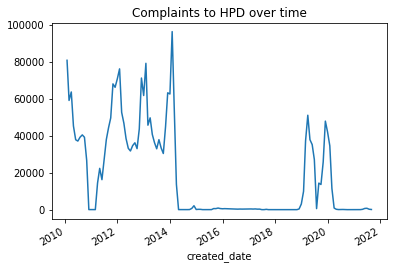

In [798]:
# Next, I would plot complaint frequency to HPD over time
df[df.agency == 'HPD'].resample('M', on='created_date').size().sort_values(ascending=False).plot(title='Complaints to HPD over time')

# This could help the team look at highs/lows in complaint frequency to HPD, an agency ajacent to NYCHA
    # This info would likely not be reported in this story, but it could help inform questions and direction when investigating NYCHA complaints
    # Even so...this could be a flawed approach, bc the organizations are not the same. So I wouldn't want this data analysis to lead to a miss when digging around NYCHA
